In [8]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##### Crashes data preprocessing 

In [10]:
crashes = pd.read_csv('data/car_crashes.csv').iloc[1:]

Some of the rows in CRASH_DATE column have no time, the folowing command adds 09:45 to these rows

In [11]:
crashes['CRASH_DATE'] = crashes['CRASH_DATE'].apply(lambda x: x if len(x) == 23 else x + ' ' + '09:45:00 PM')

To datetime format

In [12]:
crashes['CRASH_DATE'] = crashes['CRASH_DATE'].apply(lambda x: datetime.strptime(x, '%Y %b %d %I:%M:%S %p'))

Extracting only potentially important features 

In [13]:
crashes = crashes[['CRASH_DATE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']];

Creating new feature consisting of date and hour of crash

In [16]:
crashes['DATE_HOUR'] = crashes['CRASH_DATE'].apply(lambda x : str(x.date()) + ' ' + str(x.hour))

##### Weather data preprocessing 

In [62]:
weather = pd.read_csv('data/2018-05-08.csv').iloc[:,1:]

In [63]:
weather.columns = ['Time', 'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.', 'Precip Accum', 'Condition', "Date"]

In [64]:
weather['Time'] = weather['Time'].apply(lambda x: datetime.strptime(x, '%I:%M %p').hour)

In [65]:
weather['DATE_HOUR'] = weather['Date'].map(str).apply(lambda x: x.split(' ')[0]) + ' ' + weather["Time"].map(str)

In [66]:
for col_name in ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']:
    weather[col_name] = weather[col_name].map(str).apply(lambda x: x.split('\n')[0])

In [67]:
weather = weather.drop(['Precip.', 'Precip Accum', 'Condition', 'Wind'], axis = 1);

Merging two data sets

In [1]:
data_all = pd.merge(weather, crashes, on="DATE_HOUR").dropna().drop('Time', axis = 1)

NameError: name 'pd' is not defined

In [2]:
data_all.to_csv('data/data_all.csv')

NameError: name 'data_all' is not defined

In [7]:
cat_data = data_o_cat.drop_duplicates(subset='DATE_HOUR')[['DATE_HOUR', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

In [8]:
cat_data;

In [9]:
data_o[["Temperature", "Dew Point", 'Humidity', 'Wind Speed', 'Wind Gus', 'Pressure', 'INJURIES_TOTAL', 'NJURIES_FATAL']] = data_o[["Temperature", "Dew Point", 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'INJURIES_TOTAL', 'INJURIES_FATAL']].apply(pd.to_numeric)

In [10]:
agg = data_o.groupby('DATE_HOUR').agg({'Temperature': 'mean', 'Dew Point': 'mean', 'Humidity': 'mean', 'Wind Speed': 'mean', 'Pressure': 'mean', 'Date': 'count', 'INJURIES_TOTAL' : 'sum'}
                                     )

In [11]:
agg =agg.reset_index()

In [12]:
agg = agg.rename(columns = {'Date': 'Crashes'})

In [13]:
agg_cat = pd.merge(agg, cat_data, on="DATE_HOUR")

In [14]:
agg_cat.head()

,DATE_HOUR,Temperature,Dew Point,Humidity,Wind Speed,Pressure,Crashes,INJURIES_TOTAL,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,2018-08-05 15,94.0,63.0,36.0,20.0,29.4,11,6.0,CLEAR,DAYLIGHT,DRY,15.0,1.0,8.0
1,2018-08-05 16,93.0,64.0,38.0,18.0,29.3,14,0.0,CLEAR,DAYLIGHT,DRY,16.0,1.0,8.0
2,2018-08-05 17,93.0,63.0,37.0,17.0,29.3,14,7.0,CLEAR,DAYLIGHT,DRY,17.0,1.0,8.0
3,2018-08-05 18,90.0,67.0,46.0,14.0,29.4,13,4.0,CLEAR,DAYLIGHT,DRY,18.0,1.0,8.0
4,2018-08-05 19,88.0,68.0,51.0,9.0,29.4,11,2.0,CLEAR,DUSK,DRY,19.0,1.0,8.0


In [21]:
agg_cat = agg_cat[agg_cat['Humidity'] > 40]

In [22]:
X = agg_cat.loc[:,['Temperature', 'Humidity', 
                      'Wind Speed', 'Pressure', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

In [23]:
X['Wind Speed'] = X['Wind Speed'].apply(np.sqrt)

In [25]:
y = agg_cat.loc[:,['Crashes']].apply(np.log)

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [28]:
std = StandardScaler()
std.fit(X_train[['Temperature', 'Humidity', \
                      'Wind Speed', 'Pressure']].values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
X_tr = std.transform(X_train[['Temperature', 'Humidity', \
                      'Wind Speed', 'Pressure']].values)

In [30]:
X_tr = pd.DataFrame(X_tr)

In [31]:
X_tr.columns = ['Temperature', 'Humidity', 'Wind Speed', 'Pressure']

In [32]:
X_tr.head()

,Temperature,Humidity,Wind Speed,Pressure
0,0.975736,1.577753,-0.962369,-0.446160
1,-0.287678,1.577753,0.537580,-3.363523
2,0.520907,1.051131,0.228366,0.040068
3,-0.793043,0.524509,-0.720521,-0.446160
4,-0.590897,-0.303040,-0.501874,0.040068


In [33]:
X_te = std.transform(X_test[['Temperature', 'Humidity', 'Wind Speed', 'Pressure']].values)

In [34]:
X_val = std.transform(X_val[['Temperature', 'Humidity', 'Wind Speed', 'Pressure']].values)

In [35]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
y_train = y_train.reset_index(drop=True)

In [90]:
X_tr_s = X_tr.copy(deep = True)

In [91]:
X_tr_s = X_tr_s[['Temperature', 'Humidity', 'Wind Speed', 'Pressure']]

In [74]:
#X_train['LIGHTING_CONDITION'].value_counts()

In [75]:
#dark_and_rain = X_tr_s['LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD']* X_tr_s['WEATHER_CONDITION_RAIN']

In [92]:
X_tr_s['Hum + Wind Speed'] = X_tr_s['Humidity']*X_tr_s['Wind Speed']

In [93]:
X_tr_s['Hum_sq'] = X_tr_s['Humidity']**2

In [94]:
X_tr_s['Temperature*Hum'] = X_tr_s['Humidity']*X_tr_s['Temperature']

In [95]:
X_tr_s['Hum**3'] = X_tr_s['Humidity']**3

In [1083]:
#X_tr_s = pd.get_dummies(X_tr_s)

In [1044]:
import numpy as np

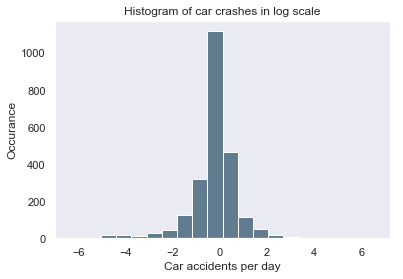

In [46]:
count, bins, ignored = plt.hist(X_tr_s['Hum + Wind Speed'].values, 20, density=False, align='mid', color='#607c8e')
plt.title('Histogram of car crashes in log scale')
plt.ylabel('Occurance')
plt.xlabel('Car accidents per day')
plt.grid(False)
plt.savefig('target_log') 

In [96]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_tr_s))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Crashes   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     31.84
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           8.09e-48
Time:                        23:40:52   Log-Likelihood:                -3034.0
No. Observations:                2352   AIC:                             6086.
Df Residuals:                    2343   BIC:                             6138.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2956      0.025     93.015      0.000       2.247       2.344
Temperature          0.0553      0.020      2.726      0.006       0.016       0.095
Humidity            -0.1227      0.037     -3.275      0.001      -0.196      -0.049
Wind Speed           0.1674      0.020      8.486      0.000       0.129       0.206
Pressure            -0.0372      0.021     -1.729      0.084      -0.079       0.005
Hum + Wind Speed     0.1029      0.018      5.635      0.000       0.067       0.139
Hum_sq               0.1434      0.018      7.996      0.000       0.108       0.179
Temperature*Hum     -0.0389      0.019     -2.092      0.037      -0.075      -0.002
Hum**3               0.0451      0.014      3.188      0.001       0.017       0.073
==============================================================================
Omnibus:                       74.875   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.823
Skew:                          -0.434   Prob(JB):                     1.71e-18
Kurtosis:                       3.283   Cond. No.                         6.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [843]:
data_o[["Temperature", "Dew Point", 'Humidity', 'Wind Speed', 'Wind Gus', 'Pressure', 'INJURIES_TOTAL', 'NJURIES_FATAL']] = data_o[["Temperature", "Dew Point", 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'INJURIES_TOTAL', 'INJURIES_FATAL']].apply(pd.to_numeric)

In [ ]:
sns.pairplot(agg_cat, plot_kws=dict(alpha=.1, edgecolor='none'))
plt.title('Multicollinearity')
#plt.grid(False)
#plt.savefig('Multicollinearity') 

In [98]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X_tr_s, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.08810442, 0.07968385, 0.09917652, 0.10989255, 0.07008584])

In [100]:
lm_reg = Ridge(alpha=1)

In [105]:
lm_lasso = Lasso(alpha = 1)

In [99]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X_tr_s, y_train, cv=kf, scoring='r2')))

0.08765195921985429


In [103]:
print(np.mean(cross_val_score(lm_reg, X_tr_s, y_train, cv=kf, scoring='r2')))

0.08766118458129016


In [106]:
print(np.mean(cross_val_score(lm_lasso, X_tr_s, y_train, cv=kf, scoring='r2')))

-0.0033838184579032316


In [110]:
X_model= agg_cat.loc[:,['Temperature', 'Humidity', 'Wind Speed', 'Pressure']]

In [121]:
X_model

In [111]:
y_model = agg_cat.loc[:,['Crashes']]

In [124]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    y = agg_cat.loc[:,['Crashes']].apply(np.log)
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    std = StandardScaler()
    std.fit(X_train.values)
    X_train = std.transform(X_train.values)
    
    X_val = std.transform(X_val.values)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    #print('\nValidation R^2 score was:', val_score)
    #print('Feature coefficient results: \n')
    return val_score, lr_model.coef_

In [125]:
split_and_validate(X_model, y_model)

(0.03727383211793622,
 array([[ 0.07684155, -0.05244199,  0.16553984, -0.0448574 ]]))